## GeoPandas Demo: Get Counties
This example demonstrates how to grab data from an ArcGIS MapService and pull it into a GeoPandas data frame.

In [1]:
import requests
import pandas as pd
import geopandas as gpd

%matplotlib inline

### Fetching some data
We'll tap into a NOAA map server to pull some state boundary features...
* Build the request
* Send the request, receive the response

In [2]:
#Build the request and parameters to fetch county features
#  from the NOAA ArcGIS map server end point
stateFIPS = '37' #This is NC

url = 'https://nowcoast.noaa.gov/arcgis/rest/services/nowcoast/mapoverlays_political/MapServer/find'
params = {'searchText':stateFIPS,
          'contains':'true',
          'searchFields':'STATEFP',
          'sr':'',
          'layers':'2',
          'layerDefs':'',
          'returnGeometry':'true',
          'maxAllowableOffset':'',
          'geometryPrecision':'',
          'dynamicLayers':'',
          'returnZ':'false',
          'returnM':'false',
          'gdbVersion':'',
          'returnUnformattedValues':'false',
          'returnFieldName':'false',
          'datumTransformations':'',
          'layerParameterValues':'',
          'mapRangeValues':'',
          'layerRangeValues':'',
          'f':'json'}

In [3]:
#Fetch the data
response = requests.get(url,params)

### Examining the response
* Convert the response to a JSON object
* Examine its structure
* Extract the `attributes` and `geometry` elements.

In [4]:
#Convert to a JSON object (i.e. a dictionary)
respons_js = response.json()

In [5]:
#The 'results' object contains a record for each county returned, i.e., a feature
results = respons_js['results']
len(results)

100

In [6]:
#Within each item in the results object are the following items
results[0].keys()

dict_keys(['layerId', 'layerName', 'displayFieldName', 'foundFieldName', 'value', 'attributes', 'geometryType', 'geometry'])

In [7]:
#The 'attributes' item contains the feature attributes
results[0]['attributes']

{'FID': '159',
 'Shape': 'Polygon',
 'STATEFP': '37',
 'COUNTYFP': '015',
 'COUNTYNS': '01026334',
 'GEOID': '37015',
 'NAME': 'Bertie',
 'LSAD': '06',
 'ALAND': '1811097673',
 'AWATER': '108727758',
 'AFFGEOID': '0500000US37015'}

In [8]:
#And the geometry object contains the shape
results[0]['geometry']

{'rings': [[[-8608078.87744889, 4310879.947869732],
   [-8607855.681813259, 4311157.199401064],
   [-8607283.054183457, 4311298.513661726],
   [-8607034.255056638, 4311564.619169095],
   [-8606785.344632704, 4312363.801388674],
   [-8606679.591093063, 4312576.761309607],
   [-8606465.968933858, 4312789.725423373],
   [-8604441.846024798, 4313053.388036737],
   [-8604014.71301244, 4313159.460997633],
   [-8603356.146725837, 4313691.63226638],
   [-8603036.771017909, 4313902.138504786],
   [-8602309.965851361, 4314167.756942879],
   [-8601812.256260224, 4314273.703053501],
   [-8601279.258377463, 4314326.194305609],
   [-8599856.483525068, 4314199.857638092],
   [-8599358.662606183, 4314110.444661026],
   [-8599111.978533875, 4313985.6259121755],
   [-8598792.602814078, 4313914.124437068],
   [-8598526.103873806, 4313967.027238429],
   [-8598242.016453078, 4314126.563792094],
   [-8597955.70264633, 4314392.738811895],
   [-8597228.897491638, 4314942.60659493],
   [-8597173.905659784, 431

### Convert the elements to dataFrames
* Creating a dataFrame from the Results object
* "Exploding" the dictionary values in the `attributes` and `geometry` columns
* Concatenating dataFrames lengthwise (adding columns)

In [9]:
#Create a dataFrame from the results, 
#  keeping just the attributes and geometry objects
df = pd.DataFrame(results,columns=('attributes','geometry'))
df.head()

,attributes,geometry
0,"{'FID': '159', 'Shape': 'Polygon', 'STATEFP': ...","{'rings': [[[-8608078.87744889, 4310879.947869..."
1,"{'FID': '160', 'Shape': 'Polygon', 'STATEFP': ...","{'rings': [[[-8429869.786865463, 4291798.18384..."
2,"{'FID': '161', 'Shape': 'Polygon', 'STATEFP': ...","{'rings': [[[-8761804.792557526, 4234648.80601..."
3,"{'FID': '162', 'Shape': 'Polygon', 'STATEFP': ...","{'rings': [[[-9160749.25508372, 4257980.584786..."
4,"{'FID': '163', 'Shape': 'Polygon', 'STATEFP': ...","{'rings': [[[-8616429.51120074, 4301301.153104..."


In [10]:
#Explode the dictionary values into fields
dfCounties = df['attributes'].apply(pd.Series)
dfGeom = df['geometry'].apply(pd.Series)

In [11]:
#Combine the two
dfAll = pd.concat((dfCounties,dfGeom),axis='columns')
dfAll.head()

,FID,Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,LSAD,ALAND,AWATER,AFFGEOID,rings,spatialReference
0,159,Polygon,37,015,01026334,37015,Bertie,06,1811097673,108727758,0500000US37015,"[[[-8608078.87744889, 4310879.947869732], [-86...","{'wkid': 102100, 'latestWkid': 3857}"
1,160,Polygon,37,055,01026133,37055,Dare,06,992627006,3054395108,0500000US37055,"[[[-8429869.786865463, 4291798.183848165], [-8...","{'wkid': 102100, 'latestWkid': 3857}"
2,161,Polygon,37,101,01026327,37101,Johnston,06,2049455166,10890976,0500000US37101,"[[[-8761804.792557526, 4234648.806015472], [-8...","{'wkid': 102100, 'latestWkid': 3857}"
3,162,Polygon,37,111,01025836,37111,McDowell,06,1141169581,13956750,0500000US37111,"[[[-9160749.25508372, 4257980.584786263], [-91...","{'wkid': 102100, 'latestWkid': 3857}"
4,163,Polygon,37,117,01026328,37117,Martin,06,1194550410,751151,0500000US37117,"[[[-8616429.51120074, 4301301.153104873], [-86...","{'wkid': 102100, 'latestWkid': 3857}"


### Converting the [ESRI] geometry coordinates to a [shapely] geometric feature
The `dfAll` dataframe now has all feature attributes and the geometry object stored in the `rings` column. 
* Exploring the 'rings' object
* Exploring the `shapely` package: rings, polygons, and multipolygons
* Using shapely to create features
* Converting the dataFrame to geodataFrame
* Plotting the output

In [12]:
#Explore the values in the "ring" column, looking at the first row of data
rings = dfAll['rings'][0]
print ("There is/are {} ring(s) in the record".format(len(rings)))
print ("There are {} vertices in the first ring".format(len(rings[0])))
print ("The first vertex is at {}".format(rings[0][0]))

There is/are 1 ring(s) in the record
There are 524 vertices in the first ring
The first vertex is at [-8608078.87744889, 4310879.947869732]


So, the "ring" value in each row of our dataframe contains a *list* of rings, with each ring being a list of coordinates defining the vertices of our polyon. Usually the list of rings only includes one ring, the outer boundary of a single polygon. However, it's possible it contains more than one, e.g. the boundary of Hawaii. 

Now we'll extract the first ring object from the ring list of the first record in our dataframe and convert it to a Shapely polygon object. To do this we need to import a few Shapely geometry class objects.

In [13]:
#Import the shapely objects we'll need
from shapely.geometry import LinearRing
from shapely.geometry import Polygon

In [14]:
#Create a shapely polygon from the first ring 
ring = rings[0]        # Get the outer ring, in coordinates
r = LinearRing(ring)   # Convert coordinates to shapely ring object
s = Polygon(r)         # Convert shapely ring object to shapely polygon object
s.area                 # Show the area of the polygon

2817887320.9635873

Now that we've seen the proof of concept, we'll form a Python function that 
* takes a list of rings (i.e., the value of one row's `rings` field), 
* converts each ring item in this ring list into a Shapely LinearRing object, 
* converts *that* into a Shapely polygon object, adding each these polygons to a list, 
* and then constructs a Shapely MultiPolygon object from the list of polygons

In [15]:
#A function to convert all rings into a Shapely multipolygon object
def polyFromRings(rings):
    #Import necessary Shapely classes
    from shapely.geometry import LinearRing, Polygon, MultiPolygon
    #Construct an empty list of polygons
    polyList = []
    #Compile a list of shapely ring objects and convert to polygons
    for ring in rings:
        #Construct a ring from the ring coordinates
        r = LinearRing(ring)
        #Convert the ring to a shapely polygon
        s = Polygon(r)
        #Add the polygon to the polyList
        polyList.append(s)
    #Convert the list of polyongs to a multipolygon object
    multiPoly = MultiPolygon(polyList)
    return multiPoly

Now, we use Panda's `apply` method to apply the "polyFromRings" function above to each row's "ring" values. 

In [16]:
#Apply the function to each item in the geometry column
dfAll['geometry']=dfAll.apply(lambda x: polyFromRings(x.rings),axis='columns')

### Convert dataframe to a *geo*dataframe
With the rings successfuly converted to Shapely geometry objects, we can now "upgrade" our Pandas dataframe to a GeoPandas dataframe, capable of spatial analysis

In [17]:
#Create a geodataframe from our pandas dataframe (the geometry column must exist)
gdf=gpd.GeoDataFrame(dfAll)
gdf.head()

,FID,Shape,STATEFP,COUNTYFP,COUNTYNS,GEOID,NAME,LSAD,ALAND,AWATER,AFFGEOID,rings,spatialReference,geometry
0,159,Polygon,37,015,01026334,37015,Bertie,06,1811097673,108727758,0500000US37015,"[[[-8608078.87744889, 4310879.947869732], [-86...","{'wkid': 102100, 'latestWkid': 3857}",(POLYGON ((-8608078.87744889 4310879.947869732...
1,160,Polygon,37,055,01026133,37055,Dare,06,992627006,3054395108,0500000US37055,"[[[-8429869.786865463, 4291798.183848165], [-8...","{'wkid': 102100, 'latestWkid': 3857}",(POLYGON ((-8429869.786865463 4291798.18384816...
2,161,Polygon,37,101,01026327,37101,Johnston,06,2049455166,10890976,0500000US37101,"[[[-8761804.792557526, 4234648.806015472], [-8...","{'wkid': 102100, 'latestWkid': 3857}",(POLYGON ((-8761804.792557526 4234648.80601547...
3,162,Polygon,37,111,01025836,37111,McDowell,06,1141169581,13956750,0500000US37111,"[[[-9160749.25508372, 4257980.584786263], [-91...","{'wkid': 102100, 'latestWkid': 3857}",(POLYGON ((-9160749.255083719 4257980.58478626...
4,163,Polygon,37,117,01026328,37117,Martin,06,1194550410,751151,0500000US37117,"[[[-8616429.51120074, 4301301.153104873], [-86...","{'wkid': 102100, 'latestWkid': 3857}",(POLYGON ((-8616429.511200739 4301301.15310487...


In [18]:
#Set the projection (obtained from spatialReference column)
gdf.crs = {'init': 'epsg:3857'}

In [19]:
#Check the data types; note some should be fixed!
gdf.dtypes

FID                 object
Shape               object
STATEFP             object
COUNTYFP            object
COUNTYNS            object
GEOID               object
NAME                object
LSAD                object
ALAND               object
AWATER              object
AFFGEOID            object
rings               object
spatialReference    object
geometry            object
dtype: object

In [20]:
#Convert the `ALAND` and `AWATER` to floating point values
gdf['ALAND']=gdf['ALAND'].astype('double')
gdf['AWATER']=gdf['AWATER'].astype('double')
gdf.dtypes

FID                  object
Shape                object
STATEFP              object
COUNTYFP             object
COUNTYNS             object
GEOID                object
NAME                 object
LSAD                 object
ALAND               float64
AWATER              float64
AFFGEOID             object
rings                object
spatialReference     object
geometry             object
dtype: object

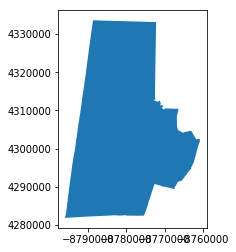

In [21]:
#Use familiar Pandas operation to select a feature and 
gdf[gdf['NAME'] == 'Durham'].plot();

### Saving the data
We can save the attributes to CSV file or save the feature class to a shapefile

In [22]:
#Save our attribute data to a shapefile
gdf.to_csv("counties_{}.csv".format(stateFIPS))

Saving data to a shapefile is a bit more finicky. In particular, we need to remove the old "rings" field in the geodataframe.

In [23]:
#Delete the 'rings' column from our geodataframe
gdf.drop('rings',axis='columns',inplace=True)

In [24]:
#Write the data to a file
gdf.to_file(driver='ESRI Shapefile',filename="./data/NC_Counties.shp")

## Recap
So here we've imported a layer from an ESRI Map Service and done the necessary conversions to get this into a GeoPandas dataframe -- and also export it. This reveals a bit about the requirements of a geodataframe, namely the structure of the geometry column and how the Shapely package helps with that. 

From here, we can explore more about the cool things we can do with a GeoPandas dataframe.